## Required lib and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

## Importing Data files

In [2]:
baner = pd.read_excel('data_source/Baner_cleaned.xlsx')
bavdhan = pd.read_excel('data_source/Bavdhan_cleaned.xlsx')
hinjewadi = pd.read_excel('data_source/Hinjawadi_cleaned.xlsx')
wakad = pd.read_excel('data_source/Wakad_cleaned.xlsx')

## Handling Data Files

In [3]:
baner['locality'] = 'Baner'
bavdhan['locality'] = 'Bavdhan'
hinjewadi['locality'] = 'Hinjewadi'
wakad['locality'] = 'Wakad'

In [4]:
baner_copy = baner.copy()
baner_copy =baner_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

bavdhan_copy = bavdhan.copy()
bavdhan_copy =bavdhan_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

hinjewadi_copy = hinjewadi.copy()
hinjewadi_copy =hinjewadi_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

wakad_copy = wakad.copy()
wakad_copy =wakad_copy.reindex(columns = ['Name', 'locality', 'ratings','off','delivery_reviews','cuisine'])

### Cleaning the delilvery reviews column

In [5]:
baner_copy.delivery_reviews=baner_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
bavdhan_copy.delivery_reviews=bavdhan_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
hinjewadi_copy.delivery_reviews=hinjewadi_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')
wakad_copy.delivery_reviews=wakad_copy.delivery_reviews.str.replace('[(,),Not, , ,enough,Delivery,Reviews]','')

### Replacing value of K with 1000

In [6]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    return x
baner_copy['delivery_reviews'] = baner_copy['delivery_reviews'].apply(value_to_float)
bavdhan_copy['delivery_reviews'] = bavdhan_copy['delivery_reviews'].apply(value_to_float)
hinjewadi_copy['delivery_reviews'] = hinjewadi_copy['delivery_reviews'].apply(value_to_float)
wakad_copy['delivery_reviews'] = wakad_copy['delivery_reviews'].apply(value_to_float)

In [7]:
baner_copy

,Name,locality,ratings,off,delivery_reviews,cuisine
0,McDonald's,Baner,4.1,₹50 OFF,9810,"Burger, Fast Food, Beverages"
1,Nawab Asia,Baner,4.1,₹50 OFF,3054,"North Indian, Chinese, Mughlai, Biryani, Desse..."
2,Mithas,Baner,4.3,₹50 OFF,2262,"Mithai, Street Food"
3,Anna Idli,Baner,4.2,₹50 OFF,21800,"South Indian, Beverages"
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504,"Mithai, Street Food, Ice Cream"
...,...,...,...,...,...,...
1132,WYNKK,Baner,NaN,50% OFF,,"Bar Food, North Indian, Mughlai, Asian"
1133,Ai Shiwu,Baner,3.6,50% OFF,1146,"Chinese, Asian, Thai"
1134,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46,Street Food
1135,Shree Datta Bhel,Baner,3.9,50% OFF,15,Street Food


### HANDLING BANER DATA SET

### Dropping NAN values

In [8]:
baner_ratings = baner_copy.dropna(subset=['ratings','delivery_reviews'])
baner_ratings = baner_ratings[baner_ratings.delivery_reviews != '']

### Converting the Values to Integers

In [9]:
def clean(x):
    try:
        return float(x)
    except:
        return np.NaN
baner_ratings['delivery_reviews']  = baner_ratings['delivery_reviews'].apply(clean)

### Converting delivery values to range of 1-5

In [10]:
baner_ratings

,Name,locality,ratings,off,delivery_reviews,cuisine
0,McDonald's,Baner,4.1,₹50 OFF,9810.0,"Burger, Fast Food, Beverages"
1,Nawab Asia,Baner,4.1,₹50 OFF,3054.0,"North Indian, Chinese, Mughlai, Biryani, Desse..."
2,Mithas,Baner,4.3,₹50 OFF,2262.0,"Mithai, Street Food"
3,Anna Idli,Baner,4.2,₹50 OFF,21800.0,"South Indian, Beverages"
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504.0,"Mithai, Street Food, Ice Cream"
...,...,...,...,...,...,...
1130,Happy Da Punjab,Baner,3.7,50% OFF,69.0,"North Indian, Chinese, Kebab, Malwani"
1133,Ai Shiwu,Baner,3.6,50% OFF,1146.0,"Chinese, Asian, Thai"
1134,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46.0,Street Food
1135,Shree Datta Bhel,Baner,3.9,50% OFF,15.0,Street Food


In [11]:
deliv = []
for x in (baner_ratings['delivery_reviews']):
    new_value = ( (x - 1.0) / (24300.0 - 1.0) ) * (5.0 - 0.0) + 0.0
    new_value = round(new_value,2)
    noob = float(new_value)
    deliv.append(noob)
baner_ratings.reset_index(inplace = True, drop = True)
df = pd.DataFrame(deliv,columns=['deliv'])
baner_ratings['deliv']= df['deliv']

In [12]:
baner_ratings

,Name,locality,ratings,off,delivery_reviews,cuisine,deliv
0,McDonald's,Baner,4.1,₹50 OFF,9810.0,"Burger, Fast Food, Beverages",2.02
1,Nawab Asia,Baner,4.1,₹50 OFF,3054.0,"North Indian, Chinese, Mughlai, Biryani, Desse...",0.63
2,Mithas,Baner,4.3,₹50 OFF,2262.0,"Mithai, Street Food",0.47
3,Anna Idli,Baner,4.2,₹50 OFF,21800.0,"South Indian, Beverages",4.49
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504.0,"Mithai, Street Food, Ice Cream",0.93
...,...,...,...,...,...,...,...
818,Happy Da Punjab,Baner,3.7,50% OFF,69.0,"North Indian, Chinese, Kebab, Malwani",0.01
819,Ai Shiwu,Baner,3.6,50% OFF,1146.0,"Chinese, Asian, Thai",0.24
820,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46.0,Street Food,0.01
821,Shree Datta Bhel,Baner,3.9,50% OFF,15.0,Street Food,0.00


### Making different sets of data

In [13]:
above_four =  baner_ratings.loc[(baner_ratings.ratings > 4.0)]
above_four.reset_index(inplace = True, drop = True)
above_three = baner_ratings.loc[(baner_ratings.ratings >3.0) & (baner_ratings.ratings < 4.0)]
above_three.reset_index(inplace = True, drop = True)
above_two = baner_ratings.loc[(baner_ratings.ratings >2.0) & (baner_ratings.ratings < 3.0)]
above_two.reset_index(inplace = True, drop = True)
above_one = baner_ratings.loc[(baner_ratings.ratings >1.0) & (baner_ratings.ratings < 2.0)]
above_one.reset_index(inplace = True, drop = True)

In [14]:
baner_ratings

,Name,locality,ratings,off,delivery_reviews,cuisine,deliv
0,McDonald's,Baner,4.1,₹50 OFF,9810.0,"Burger, Fast Food, Beverages",2.02
1,Nawab Asia,Baner,4.1,₹50 OFF,3054.0,"North Indian, Chinese, Mughlai, Biryani, Desse...",0.63
2,Mithas,Baner,4.3,₹50 OFF,2262.0,"Mithai, Street Food",0.47
3,Anna Idli,Baner,4.2,₹50 OFF,21800.0,"South Indian, Beverages",4.49
4,Dadu's Sweet Emporio,Baner,4.3,₹50 OFF,4504.0,"Mithai, Street Food, Ice Cream",0.93
...,...,...,...,...,...,...,...
818,Happy Da Punjab,Baner,3.7,50% OFF,69.0,"North Indian, Chinese, Kebab, Malwani",0.01
819,Ai Shiwu,Baner,3.6,50% OFF,1146.0,"Chinese, Asian, Thai",0.24
820,Mumbaian Pav Bhaji,Baner,3.2,50% OFF,46.0,Street Food,0.01
821,Shree Datta Bhel,Baner,3.9,50% OFF,15.0,Street Food,0.00


#### --------------------------------------------------------------------------------------------------------------------------------------------------

ValueError: shape mismatch: objects cannot be broadcast to a single shape

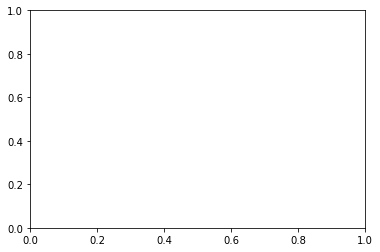

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#create data
quarter = [above_four['Name']]
product_A = [above_four['ratings']]
product_B = [above_four['deliv']]

#define chart parameters
N = 4 
barWidth = .5
xloc = np.arange(N)

#display stacked bar chart
p1 = plt.bar(xloc, product_A, width=barWidth)
p2 = plt.bar(xloc, product_B, bottom=product_A, width=barWidth)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
A = [above_four['ratings']]
B = [above_four['deliv']]
Pos = range(4)
plt.bar(Pos, A)
plt.bar(Pos, B, bottom = A)
plt.show()

In [ ]:
import matplotlib.pyplot as plt


labels = [above_four['Name']]
ratings = [above_four['ratings']]
delivery_rev = [above_four['deliv']]
#men_std = [2, 3, 4, 1, 2]
#women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, ratings, width, label='Ratings')
ax.bar(labels, delivery_rev, width, bottom=ratings,
       label='Delivery_reviews')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [ ]:
above_four['ratings']

In [ ]:
data = above_four['ratings']
plt.bar(above_four['Name'], data)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
rating = above_four['delivery_reviews'].value_count()

sns.barplot(x = rating.index, y = rating)
plt.xlabel("Ratings")
plt.ylabel("no")

In [ ]:
baner_ratings

In [ ]:
baner_ratings.plot(x="Name", y="ratings", kind="kde")

In [ ]:
plt.figure(figsize = (1000,10))
baner_ratings.plot(x="Name", y="ratings")
plt.show()

## HANDLING BAVDHAN DATA SET

In [ ]:
bavdhan_copy.info()

## HANDLING HINJEWADI DATA SET

In [ ]:
hinjewadi_copy.info()

## HANDLING WAKAD DATA SET

In [ ]:
wakad_copy.info()

In [ ]:
df = pd.concat([baner_copy, bavdhan_copy, hinjewadi_copy, wakad_copy])

In [ ]:
df

In [ ]:
df.info()

## Ratings null and Not null count

### BANER

In [ ]:
print('Null values in Baner data set:', baner_copy['ratings'].isna().sum())

In [ ]:
baner_copy['ratings'].notnull().sum()

### BAVDHAN

In [ ]:
bavdhan_copy['ratings'].isna().sum()

In [ ]:
bavdhan_copy['ratings'].notnull().sum()

### HINJEWADI

In [ ]:
hinjewadi_copy['ratings'].isna().sum()

In [ ]:
hinjewadi_copy['ratings'].notnull().sum()

### WAKAD

In [ ]:
wakad_copy['ratings'].isna().sum()

In [ ]:
wakad_copy['ratings'].notnull().sum()

In [ ]:
baner_ratings.isna().sum()

In [ ]:
baner_copy.isnull().sum()